# Titanic Dataset: Extensive Exploratory Data Analysis

This notebook performs a deep dive into the Titanic dataset to uncover patterns related to passenger survival.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


## Data Loading

In [5]:

df = pd.read_csv(r"/content/titanic_dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Shape

In [6]:

df.shape


(1309, 12)

## Missing Values

In [7]:

df.isnull().sum().sort_values(ascending=False)


,0
Cabin,1014
Age,263
Embarked,2
Fare,1
Name,0
Pclass,0
Survived,0
PassengerId,0
Parch,0
SibSp,0


## Missing Percentage

In [8]:

(df.isnull().mean()*100).round(2)


,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,20.09
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.08


## Numerical Summary

In [9]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


## Categorical Summary

In [10]:

df.select_dtypes(include='object').describe().T


,count,unique,top,freq
Name,1309,1307,"Kelly, Mr. James",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


## Age Distribution

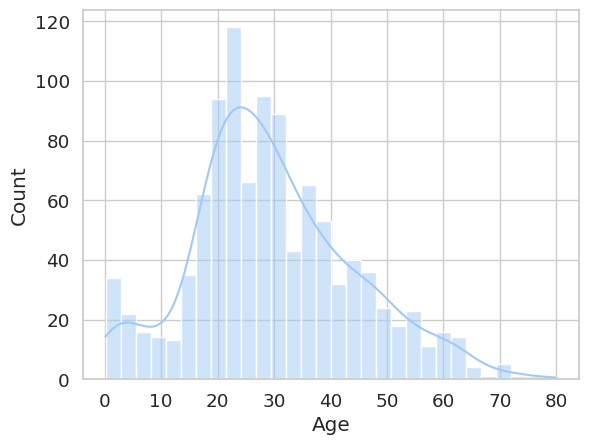

In [11]:

sns.histplot(df['Age'], bins=30, kde=True)
plt.show()


## Fare Distribution

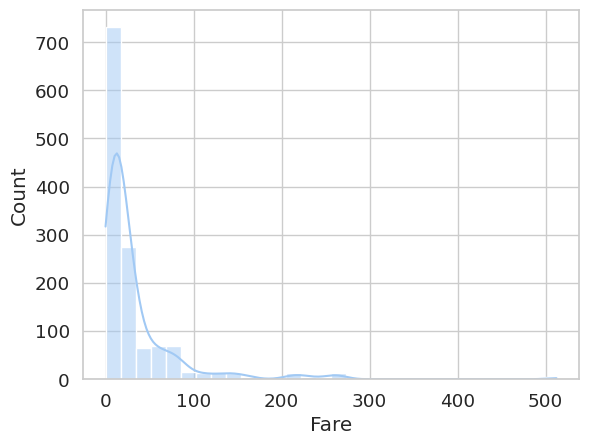

In [12]:

sns.histplot(df['Fare'], bins=30, kde=True)
plt.show()


## Survival Count

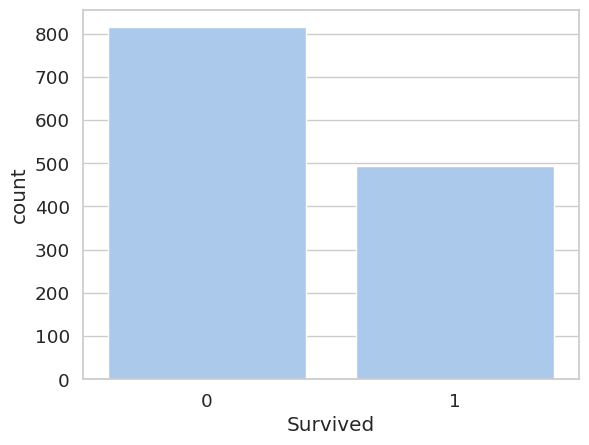

In [13]:

sns.countplot(x='Survived', data=df)
plt.show()


## Survival by Gender

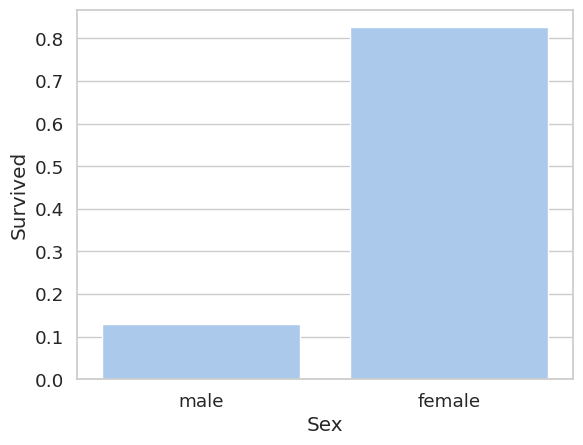

In [14]:

sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.show()


## Survival by Class

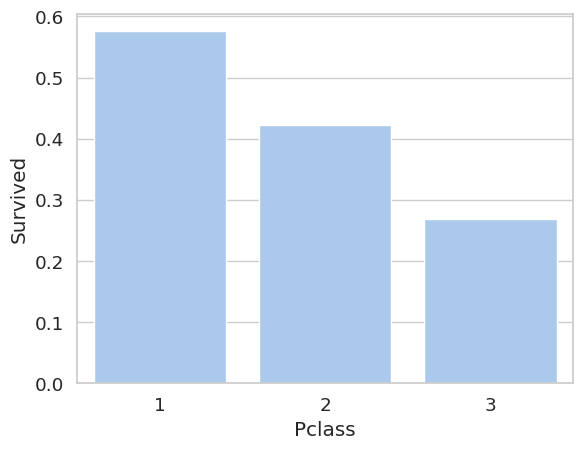

In [15]:

sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.show()


## Feature Engineering: Family Size

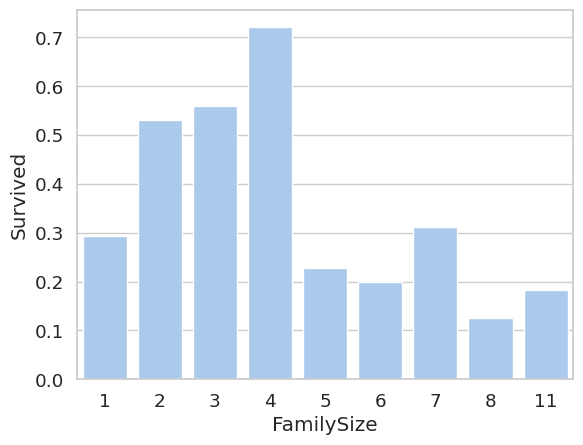

In [16]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)
plt.show()


## Correlation Heatmap

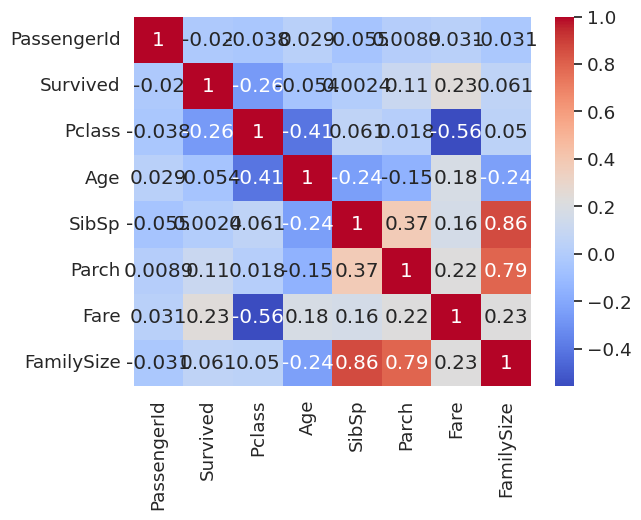

In [17]:

corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Conclusion
Sex, Pclass, and Age are the strongest predictors of survival.